In [1]:
# Importing important and useful modules/libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import nltk, gensim
import re
import string

In [2]:
bbc_text_df = pd.read_csv("bbc_text.csv")
bbc_text_df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


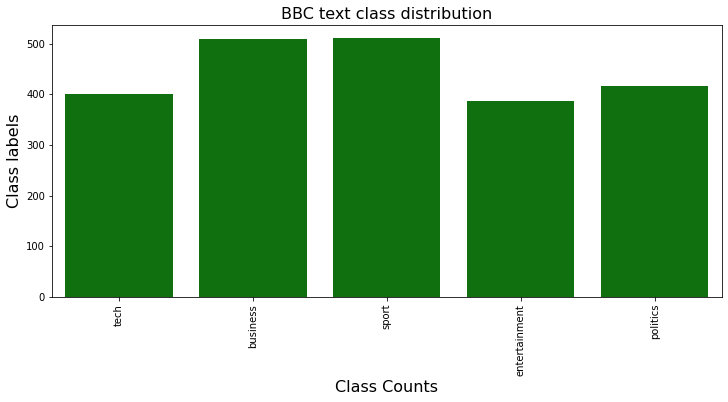

In [3]:
plt.figure(figsize=(12,5))
sns.countplot(x = bbc_text_df['category'], color = 'green')
plt.title("BBC text class distribution", fontsize = 16)
plt.xlabel('Class Counts', fontsize=16)
plt.ylabel('Class labels', fontsize = 16)
plt.xticks(rotation = 'vertical')
plt.show()

In [4]:
import gensim.parsing .preprocessing as gsp
from gensim import utils
filters = [
    gsp.strip_tags, # Removes hashtags and twitter format.
    gsp.strip_punctuation, # Removes punctuation marks.
    gsp.strip_multiple_whitespaces, # Removes unnescessary Whitespaces.
    gsp.strip_numeric, # Removes digits.
    gsp.remove_stopwords, # Removes stopwords which won't contribute to the overall model building.
    gsp.stem_text # Stemming in order to bring advanced words to root words.
]

def clean_text(s):
    s = s.lower()
    s = utils.to_unicode(s)
    for f in filters:
        s = f(s)
    
    return s

In [5]:
bbc_text_df.iloc[2,1]

'tigers wary of farrell  gamble  leicester say they will not be rushed into making a bid for andy farrell should the great britain rugby league captain decide to switch codes.   we and anybody else involved in the process are still some way away from going to the next stage   tigers boss john wells told bbc radio leicester.  at the moment  there are still a lot of unknowns about andy farrell  not least his medical situation.  whoever does take him on is going to take a big  big gamble.  farrell  who has had persistent knee problems  had an operation on his knee five weeks ago and is expected to be out for another three months. leicester and saracens are believed to head the list of rugby union clubs interested in signing farrell if he decides to move to the 15-man game.  if he does move across to union  wells believes he would better off playing in the backs  at least initially.  i m sure he could make the step between league and union by being involved in the centre   said wells.  i t

In [6]:
clean_text(bbc_text_df.iloc[2,1])

'tiger wari farrel gambl leicest rush make bid andi farrel great britain rugbi leagu captain decid switch code anybodi involv process wai awai go stage tiger boss john well told bbc radio leicest moment lot unknown andi farrel medic situat go big big gambl farrel persist knee problem oper knee week ago expect month leicest saracen believ head list rugbi union club interest sign farrel decid man game union well believ better plai back initi m sure step leagu union involv centr said well think england prefer progress posit row us rugbi leagu skill forward juri cross divid club balanc struck cost gambl option bring readi replac'

In [9]:
from wordcloud import WordCloud

def plot_word_cloud(text):
    wordcloud_instance = WordCloud(width = 800, height = 800,
                background_color='white',
                stopwords=None,
                min_font_size = 10).generate(text)
    plt.figure(figsize=(8,8), facecolor=None)
    plt.imshow(wordcloud_instance)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

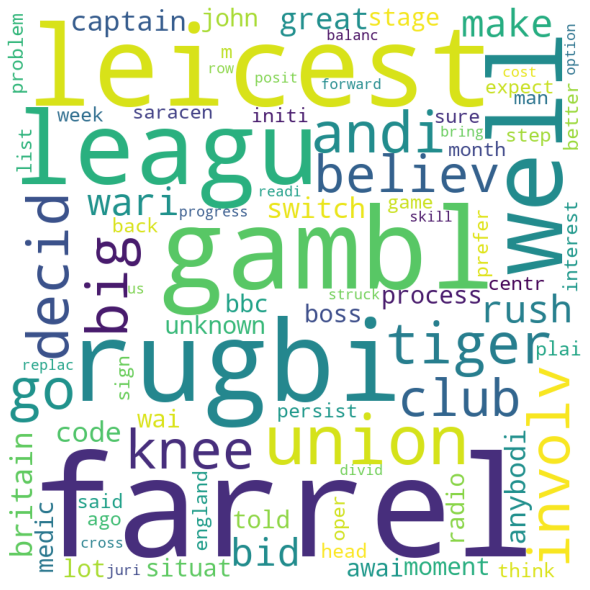

In [10]:
plot_word_cloud(clean_text(bbc_text_df.iloc[2,1]))

In [15]:
def plot_word_cloud_for_category(bbc_text_df, category):
    text_df = bbc_text_df.loc[bbc_text_df['category'] == str(category)]
    texts = ''
    for index, item in text_df.iterrows():
        texts = texts + ' ' + clean_text(item['text'])
    print(category, "Category-------------------------")
    plot_word_cloud(texts)

entertainment Category-------------------------


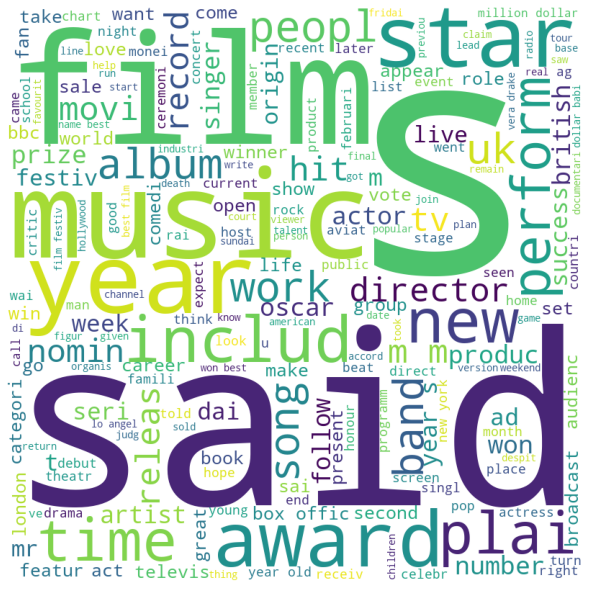

business Category-------------------------


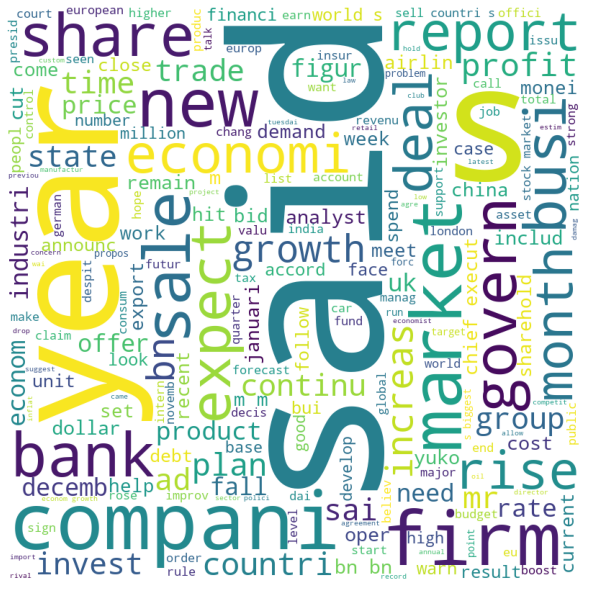

tech Category-------------------------


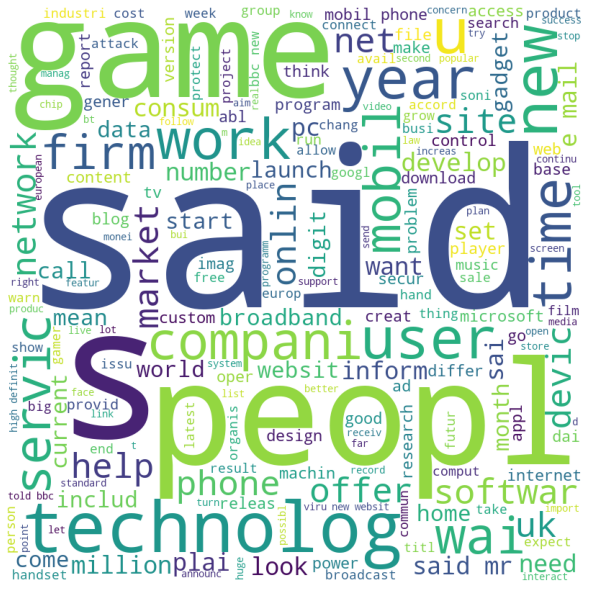

sport Category-------------------------


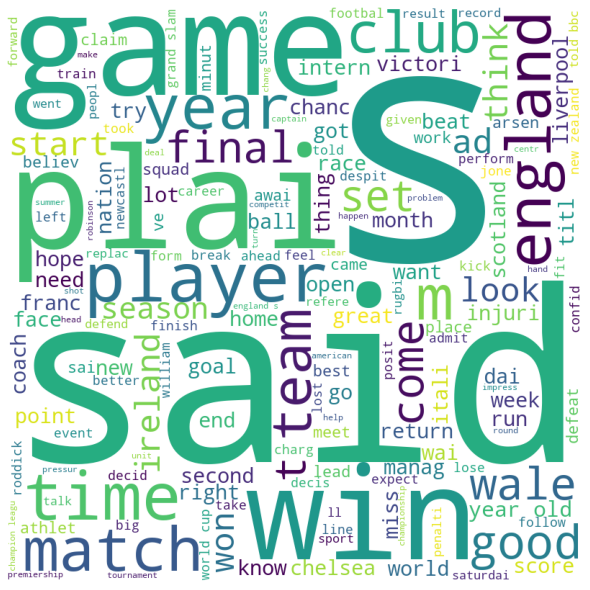

politics Category-------------------------


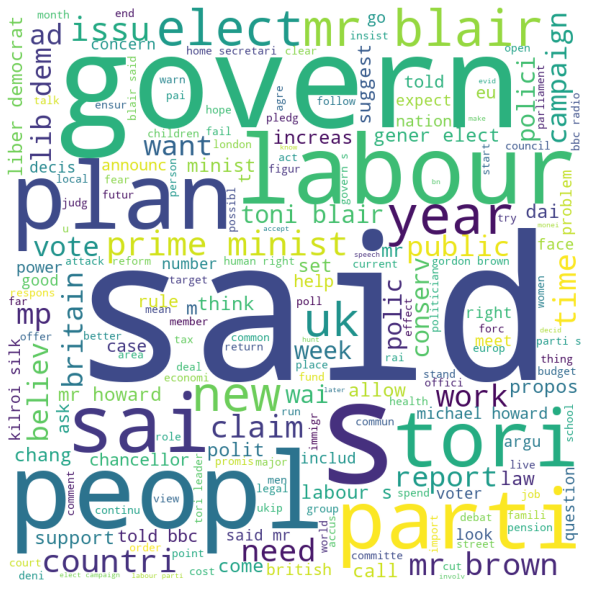

In [16]:
for cat in list(set(list(bbc_text_df['category']))):
    plot_word_cloud_for_category(bbc_text_df,cat)

In [17]:
df_x = bbc_text_df['text']
df_y = bbc_text_df['category']

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import BaseEstimator

class Text2TfIdfTransformer(BaseEstimator):
    
    def __init__(self):
        self._model = TfidfVectorizer()
        pass
    
    def fit(self, df_x, df_y=None):
        df_x = df_x.apply(lambda x : clean_text(x))
        self._model.fit(df_x) 
        return self
    
    def transform(self, df_x):
        return self._model.transform(df_x)

In [21]:
tfidf_transformer = Text2TfIdfTransformer()
tfidf_vectors = tfidf_transformer.fit(df_x).transform(df_x)

In [22]:
tfidf_vectors.shape

(2225, 18904)

In [23]:
print(tfidf_vectors)

  (0, 18806)	0.0285932638021717
  (0, 18605)	0.013128050051495888
  (0, 18474)	0.06756766257568819
  (0, 18448)	0.16926140132287168
  (0, 18317)	0.0341157608815222
  (0, 18249)	0.07853699279345609
  (0, 18220)	0.08765339142508223
  (0, 18170)	0.09228473205842505
  (0, 17985)	0.026696147410642006
  (0, 17974)	0.041905765446185295
  (0, 17958)	0.025343470313755577
  (0, 17770)	0.11083498971107587
  (0, 17721)	0.06243605180887011
  (0, 17362)	0.042129618999139376
  (0, 17304)	0.25517423796664346
  (0, 17153)	0.052477304253189826
  (0, 16991)	0.026151324361738275
  (0, 16957)	0.013248940614172361
  (0, 16932)	0.04654352513129067
  (0, 16931)	0.11342719960197174
  (0, 16890)	0.02120231892579031
  (0, 16887)	0.026238652126594913
  (0, 16768)	0.11547916391699305
  (0, 16756)	0.32580467591903467
  (0, 16658)	0.022576484280245997
  :	:
  (2224, 8178)	0.5554941760150036
  (2224, 8064)	0.10226374007302491
  (2224, 7506)	0.11194511747688254
  (2224, 7477)	0.0589324755687766
  (2224, 7422)	0.046228

In [24]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(list(set(list(bbc_text_df['category']))))

LabelEncoder()

In [25]:
list(le.classes_)

['business', 'entertainment', 'politics', 'sport', 'tech']

In [26]:
le.transform(list(set(list(bbc_text_df['category']))))

array([1, 0, 4, 3, 2])

In [27]:
bbc_text_df['category'] = le.transform(bbc_text_df['category'])

In [28]:
from sklearn.model_selection import train_test_split
#Split test and training data set
X_train, X_test, y_train, y_test = train_test_split(bbc_text_df['text'].values.astype('U'),bbc_text_df['category'].values.astype('int32'), test_size=0.10, random_state=0)
classes  = bbc_text_df['category'].unique()

In [29]:
classes

array([4, 0, 3, 1, 2])

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier